In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

![title](figs/COMPGEOP_TITLE.jpg)

# Chapter 6: Ordinary Differential Equations

## Introduction
Ordinary differential equations (ODEs) and partial differential equations (PDEs) play a central role in modeling physical problems. Although some ODEs can be solved analytically, in most practical cases ODEs **cannot** be solved analytically or the solutions are very difficult. Thanks for the development of modern computing technology, most of ODEs can be solved or approximated by numerical methods, which will be covered in this chapter. 

We will mainly focus on solving first-order ODEs, which is the foundation to solve high-order ODEs and coupled ODEs, which we will briefly introduce at the end of this chapter. 

First-order ODEs has the form of 
$$
y' = f(x,y), \ \ \ y(x_0)=y_0
$$
where $x_0$ and $y_0$ are initial value of the problem and are given. We also assume that the problem has a unique solution on some open interval $a < x < b$ containing $x_0$. 

The methods we use in this section are **step-by-step methods**, which compute approximate numeric values of the solution $y_n = y(x_n)$ at the equidistant points on the x-axis
$$
x_1 = x_0 + h, \ \ \ 
x_2 = x_0 + 2h, \ \ \
x_2 = x_0 + 3h, \ \ \
... \ \ \ 
$$
where the **step size** $h$ is a fixed number, for instance, 0.1 or 0.05 or 0.01. How to choose $h$ and the associated error will be discussed later as well. 

## Euler Method

Let's remind ourselves again on the Taylor series:
$$
y(x+h) = y(x) + hy'(x) + \frac{h^2}{2} y''(x)\  + \  ...
$$
if we approximate the Taylor series only using the first term, 
and substitute the equation we try to solve:
$$
y(x+h) \approx y(x) + h y'(x)
 = y(x) + hf(x,y).
$$
This gives us **Euler method**:
$$
y_{n+1} = y_n + hf(x_n, y_n)
$$

### Python example
Let's solve a simple problem $y'=x+y$, with initial condition $x_0=0, y_0=0$. 
This problem has a analytical solution as $y=e^x-x-1$.

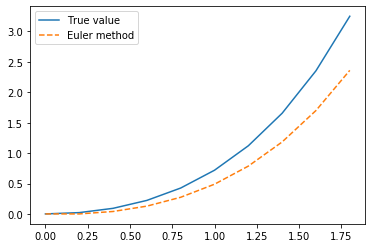

In [18]:
import numpy as np

# define the ODE y' = f
f = lambda x,y: x+y

# define range and step number to calculate step size
# try different N and see how the error changes
L = 2.0; N = 10
h = L/N;

# apply Euler method
y = np.zeros(N)
x = h*np.arange(N)
for i in range(1,N):
    y[i] = y[i-1] + h*f(x[i-1],y[i-1])
y_euler = y

# calculate the true value (analytical solution)
y_ana = np.exp(x)-x-1

# make the plot and compare:
plt.figure()
plt.plot(x,y_ana,label='True value')
plt.plot(x,y_euler,'--',label='Euler method')
plt.legend()
plt.show()

### Error of the Euler Method
As seen in the python example, Euler method is quite inaccurate. From Taylor's formula, we can estimate its error as:
$$
y(x+h) = y(x) + hy'(x) + \frac{1}{2} h^2 y''(\xi)
$$
where $\xi$ is an unknown value between $x$ and $x+h$. Keep in mind that this is the error of each step, which is called **local truncatoin error**, and is proportional to $h^2$, written $O(h^2)$, where $O$ suggests order. Because the number of steps is proportional to $1/h$, the total error or **global error** is proportional to $h^2(1/h)=h^1$. We can see that Euler method is called a **first-order method**.

### Adaptive Step Size Selection
Euler method does not require the step size to be constant, which gives the opportunity of model softwares


# Acknowledgement

Most of this teaching material is based on:

Kreyszig, E., 2018. Advanced Engineering Mathematics, 10-th edition.